In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
from wordcloud import WordCloud
import ast
import matplotlib.pyplot as plt
import yfinance as yf


# Analysis: Message Body

In [2]:
# Define a function to convert the string representation of a list into an actual list
def fast_convert_to_list(s):
    # Remove the brackets and split the string by commas
    return [item.strip().strip("'") for item in s.strip("[]").split(",")]

body = pd.read_csv('E:\\analysis_data\\mes_info.csv')
print('body loaded')

mes_df = pd.read_csv('E:\\analysis_data\\have_symbol_sentiment_big.csv')
print('message loaded')

body loaded
message loaded


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date', ylabel='Close'>

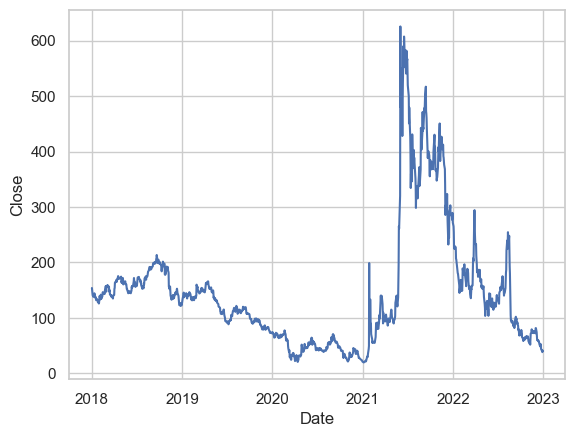

In [73]:
ticker_symbol = 'AMC'  
ticker_low = "amc"
# Get the stock data for a specific period
stock_data = yf.download(ticker_symbol, start='2018-01-01', end='2022-12-31').reset_index()
sns.lineplot(data = stock_data, x = 'Date',y = 'Close')

C:\Users\xl2860\AppData\Local\Temp\50\ipykernel_14164\1519176688.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['important_words'] = df['important_words'].apply(ast.literal_eval)
C:\Users\xl2860\AppData\Local\Temp\50\ipykernel_14164\1519176688.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['important_words'] = df['important_words'].apply(ast.literal_eval)


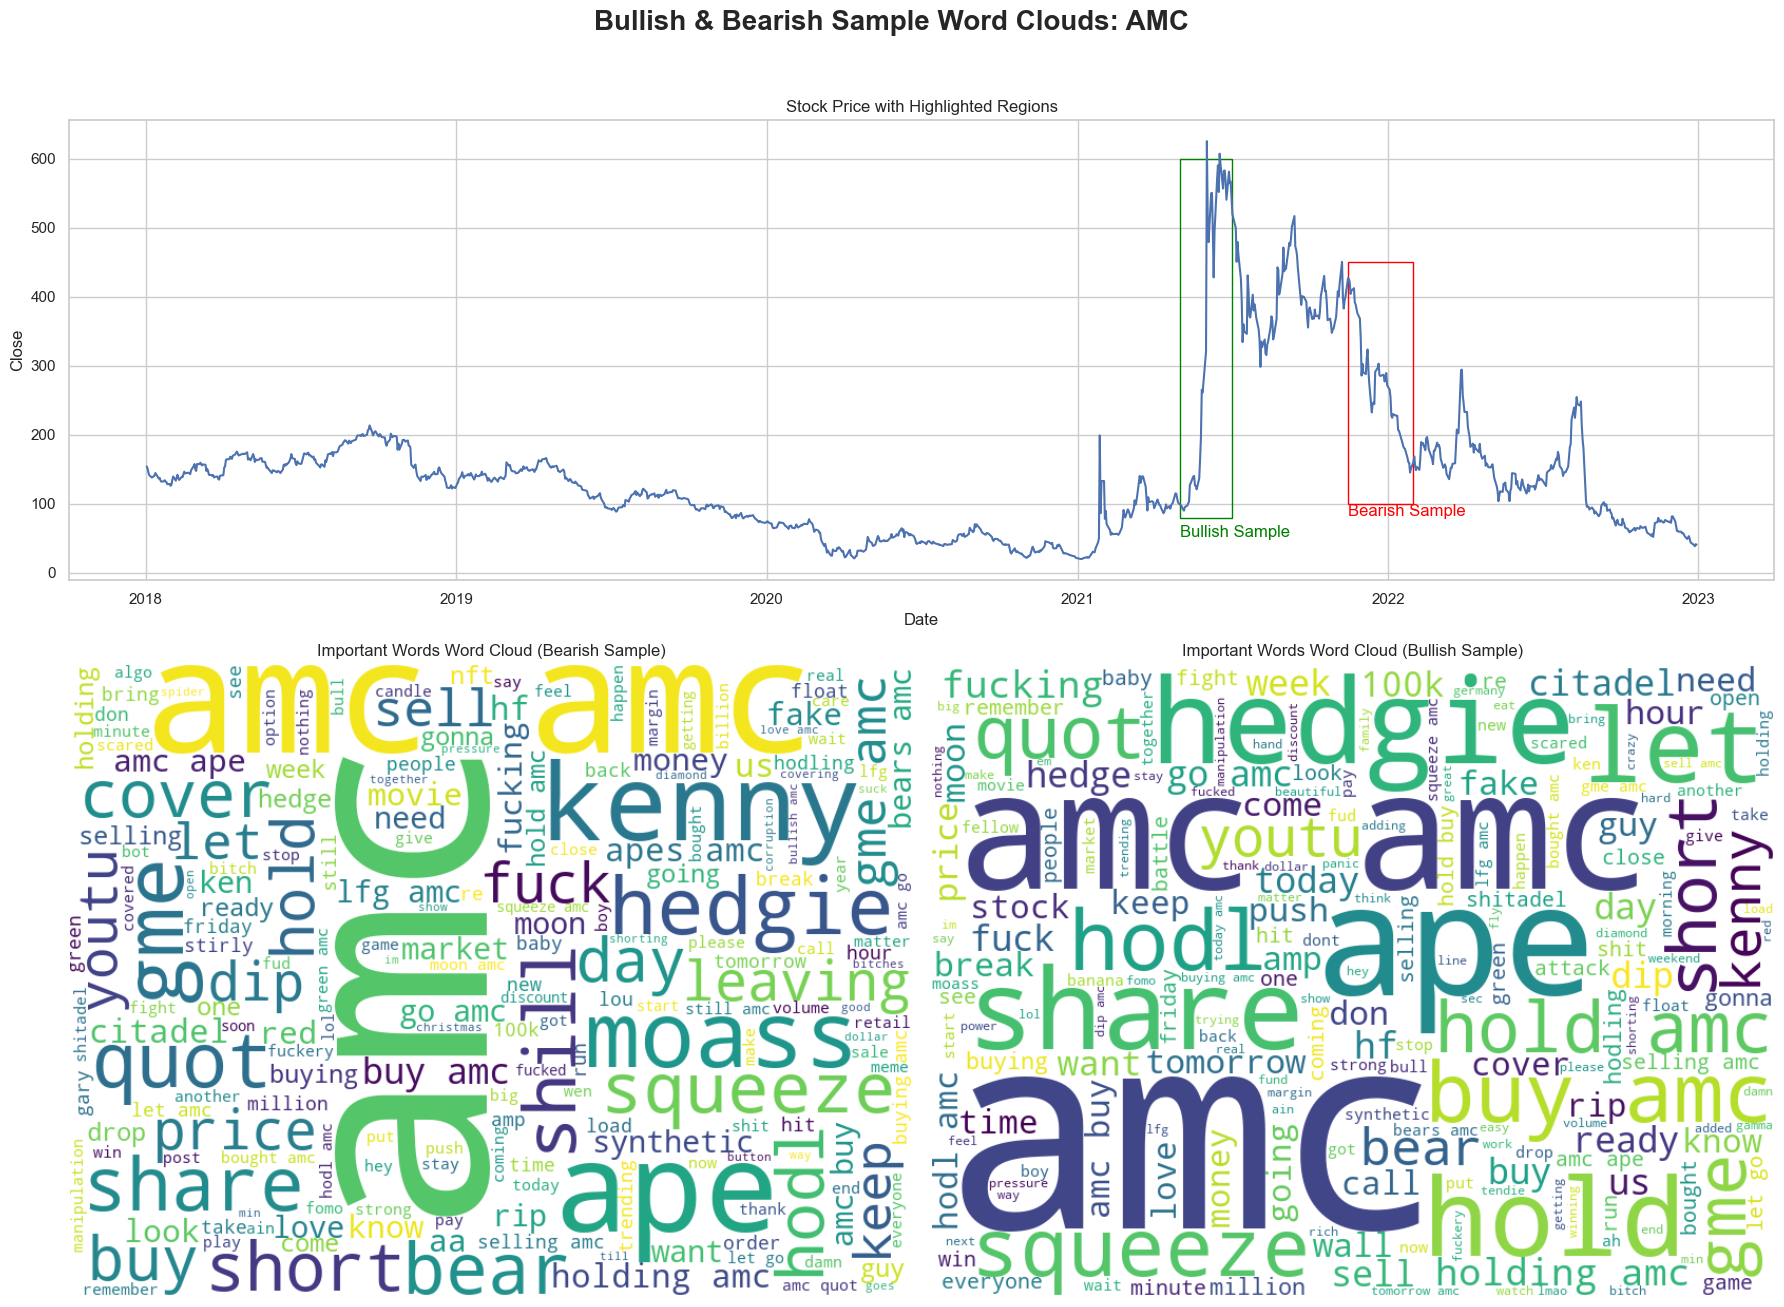

In [81]:
# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(2, 2, height_ratios=[0.6, 1])

# First subplot: Line plot with highlighted regions
ax1 = fig.add_subplot(gs[0, :])
sns.lineplot(data=stock_data, x='Date', y='Close', ax=ax1)

# Define and add the first rectangle (Bearish Sample)
xmin = pd.to_datetime('2021-11-15')
xmax = pd.to_datetime('2022-01-31')
ymin = 100
ymax = 450
rect1 = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='red', facecolor='none')
ax1.add_patch(rect1)
ax1.text(xmin, ymin, "Bearish Sample", color='red', fontsize=12, verticalalignment='top')

# Define and add the second rectangle (Bullish Sample)
xmin = pd.to_datetime('2021-05-01')
xmax = pd.to_datetime('2021-07-01')
ymin = 80
ymax = 600
rect2 = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='green', facecolor='none')
ax1.add_patch(rect2)
ax1.text(xmin, ymin - 10, "Bullish Sample", color='green', fontsize=12, verticalalignment='top')

ax1.set_title('Stock Price with Highlighted Regions')

# Second subplot: Word cloud for Bearish Sample
ax2 = fig.add_subplot(gs[1, 0])
mes_use = mes_df.loc[(mes_df['created_at'] >= '2021-11-15') & (mes_df['created_at'] <= '2022-01-31') & (mes_df['symbol_list'].str.contains(ticker_symbol, case=False, na=False))]
brlist = list(mes_use['message_id'])
br = body.loc[body['message_id'].isin(brlist)]
df = br
df['important_words'] = df['important_words'].apply(ast.literal_eval)
all_words = [word for words_list in df['important_words'] for word in words_list ]#if word != ticker_low]
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(' '.join(all_words))
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Important Words Word Cloud (Bearish Sample)')

# Third subplot: Word cloud for Bullish Sample
ax3 = fig.add_subplot(gs[1, 1])
mes_use = mes_df.loc[(mes_df['created_at'] >= '2021-05-01') & (mes_df['created_at'] <= '2021-07-01') & (mes_df['symbol_list'].str.contains(ticker_symbol, case=False, na=False))]
brlist = list(mes_use['message_id'])
br = body.loc[body['message_id'].isin(brlist)]
df = br
df['important_words'] = df['important_words'].apply(ast.literal_eval)
all_words = [word for words_list in df['important_words'] for word in words_list]# if word != ticker_low]
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(' '.join(all_words))
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis('off')
ax3.set_title('Important Words Word Cloud (Bullish Sample)')

# Add a big title for the entire figure
fig.suptitle(f"Bullish & Bearish Sample Word Clouds: {ticker_symbol}", fontsize=20, weight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the big title
plt.show()

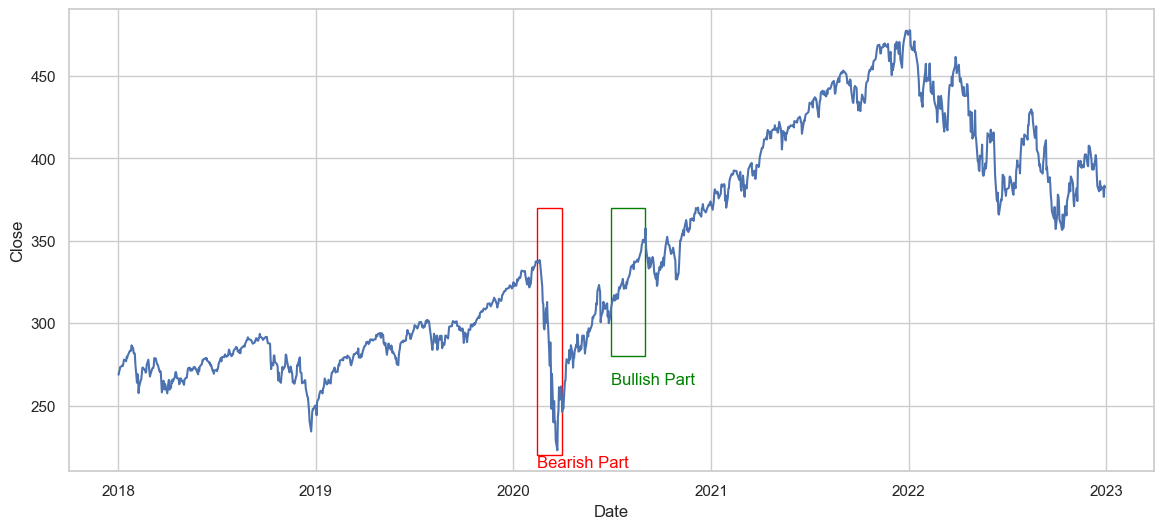

In [63]:
plt.figure(figsize=(14, 6))
sns.lineplot(data = stock_data, x = 'Date', y = 'Close')# 2020-03-18
# Define the box parameters (xmin, ymin, width, height)
xmin = pd.to_datetime('2020-02-15')
xmax = pd.to_datetime('2020-04-01')
ymin = 220
ymax = 370

# Create a Rectangle patch
rect = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='red', facecolor='none')

# Add the Rectangle to the plot
plt.gca().add_patch(rect)

# Optionally, add a label to the box
plt.text(xmin, ymin, "Bearish Sample", color='red', fontsize=12, verticalalignment='top')

# Define the box parameters (xmin, ymin, width, height)
xmin = pd.to_datetime('2020-07-01')
xmax = pd.to_datetime('2020-09-01')
ymin = 280
ymax = 370

# Create a Rectangle patch
rect = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='green', facecolor='none')

# Add the Rectangle to the plot
plt.gca().add_patch(rect)

# Optionally, add a label to the box
plt.text(xmin, ymin - 10, "Bullish Sample", color='green', fontsize=12, verticalalignment='top')

# Display the plot
plt.show()

C:\Users\xl2860\AppData\Local\Temp\50\ipykernel_14164\2235681930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['important_words'] = df['important_words'].apply(ast.literal_eval)


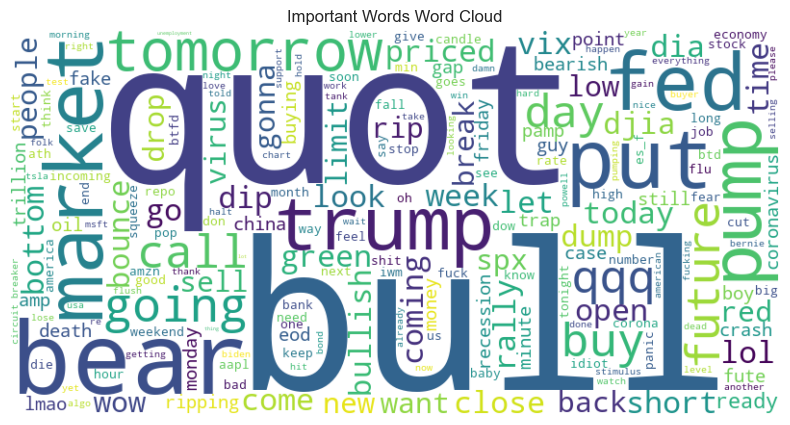

In [68]:
mes_use = mes_df.loc[(mes_df['created_at']>='2020-02-15')&(mes_df['created_at']<='2020-04-01')&(mes_df['symbol_list'].str.contains('SPY', case=False, na=False))]
brlist = list(mes_use['message_id'])
br = body.loc[body['message_id'].isin(brlist)]
df = br
df['important_words'] = df['important_words'].apply(ast.literal_eval)
# Combine all important words into a single list
all_words = [word for words_list in df['important_words'] for word in words_list if word != ticker_low]
# Convert the strings in the 'important_words' column to lists
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Important Words Word Cloud')
plt.show()

C:\Users\xl2860\AppData\Local\Temp\50\ipykernel_14164\4261475216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['important_words'] = df['important_words'].apply(ast.literal_eval)


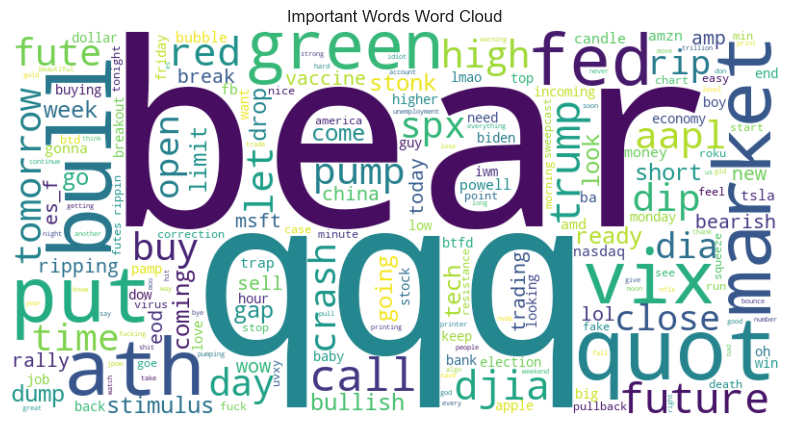

In [69]:
mes_use = mes_df.loc[(mes_df['created_at']>='2020-07-01')&(mes_df['created_at']<='2020-09-01')&(mes_df['symbol_list'].str.contains('SPY', case=False, na=False))]
brlist = list(mes_use['message_id'])
br = body.loc[body['message_id'].isin(brlist)]
df = br
df['important_words'] = df['important_words'].apply(ast.literal_eval)
# Combine all important words into a single list
all_words = [word for words_list in df['important_words'] for word in words_list if word != ticker_low]
# Convert the strings in the 'important_words' column to lists
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Important Words Word Cloud')
plt.show()